In [1]:
import data_loader

# Use senator data
arr, reps, bills = data_loader.senate_records()

print(arr)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


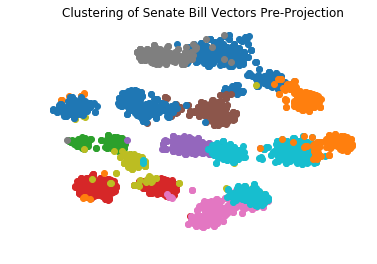

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of Senate Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

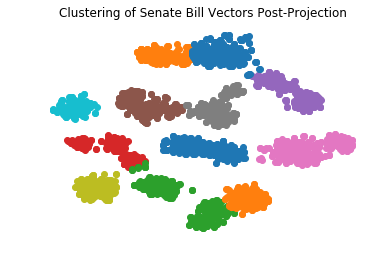

In [3]:
# Do the same after projection (not really that useful)
plt.axis('off')
num_clust = 13
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.title('Clustering of Senate Bill Vectors Post-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

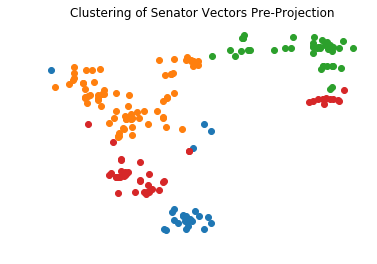

In [4]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(arr)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

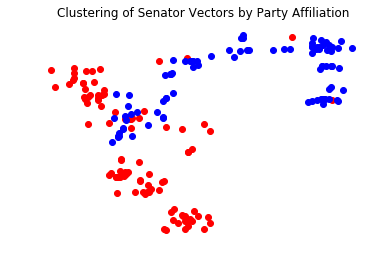

In [5]:
import numpy as np

# Senators by party with same projection

num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()

In [6]:
# Now use house data
arr, reps, bills = data_loader.house_records()

print(arr)

Unable to read 2017_711.xml
Unable to read 2013_2.xml
Unable to read 2011_2.xml
Unable to read 2015_2.xml
Unable to read 2017_2.xml
Unable to read 2019_2.xml
Unable to read 2015_581.xml


[[-1.  1.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1. -1.  0. ...  0. -1.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0. -1.  0.]
 [-1.  0.  0. ...  0. -1.  0.]]


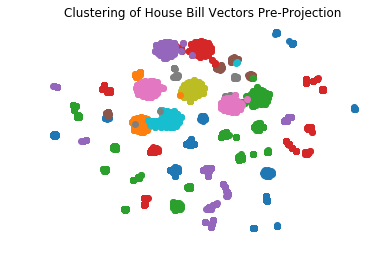

In [7]:
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 18
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of House Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

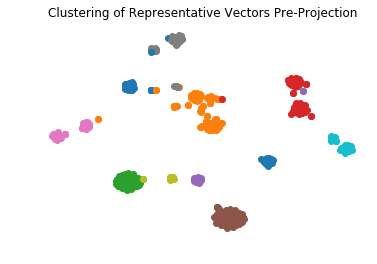

In [8]:
# House representative vector clustering
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

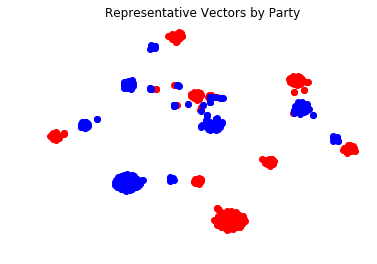

In [9]:
# House representative vectors by party
num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Representative Vectors by Party')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()

In [12]:
arr, reps, bills = data_loader.senate_records()
clusters = KMeans(n_clusters=12).fit_predict(arr.T)


TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
print(clusters)
for i in range(12):
    for bill in np.array(bills)[clusters == i]:
        print(bill)

[10 10  8 ... 10 10  8]
{'vote_result_text': 'Resolution Rejected (12-84, 2/3 majority required)', 'vote_question_text': 'On the Resolution S.Res. 8', 'majority_requirement': '2/3', 'vote_number': '4', 'session': '1', 'vote_result': 'Resolution Rejected', 'vote_date': 'January 27, 2011,  05:20 PM', 'vote_document_text': 'A resolution amending the Standing Rules of the Senate to provide for cloture to be invoked with less than a three-fifths majority after additional debate.', 'vote_title': 'S. Res. 8', 'congress': '112', 'congress_year': '2011', 'question': 'On the Resolution'}
{'vote_title': 'Cornyn Amdt. No. 357', 'congress_year': '2015', 'vote_document_text': "To raise taxes and spending by enacting President Obama's fiscal year 2016 budget.", 'vote_date': 'March 24, 2015,  06:10 PM', 'majority_requirement': '1/2', 'session': '1', 'congress': '114', 'vote_result_text': 'Amendment Rejected (1-98)', 'question': 'On the Amendment', 'vote_number': '85', 'vote_result': 'Amendment Rejecte

{'congress_year': '2015', 'vote_result': 'Amendment Agreed to', 'vote_question_text': 'On the Amendment S.Amdt. 755 to S.Con.Res. 11 (No short title on file)', 'majority_requirement': '1/2', 'session': '1', 'vote_number': '87', 'congress': '114', 'question': 'On the Amendment', 'vote_title': 'Stabenow Amdt. No. 755', 'vote_result_text': 'Amendment Agreed to (99-0)', 'vote_date': 'March 25, 2015,  04:48 PM', 'vote_document_text': 'To establish a deficit-neutral reserve fund relating to keeping the Federal Water Pollution Control Act focused on protection of water quality, to establish bright lines for Federal jurisdiction, and to create clear and unambiguous exemptions for features that the Administrator of the Environmental Protection Agency or the Secretary of the Army, acting through the Chief of Engineers, claim they are not seeking to regulate.'}
{'congress_year': '2015', 'vote_document_text': 'A bill to direct the Secretary of Veterans Affairs to provide for the conduct of annual 